In [1]:
#All Library import

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import re
import math
import string

import requests
from bs4 import BeautifulSoup
from docx2python import docx2python
import pickle

import nltk
from nltk.corpus import stopwords

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
#Script Names with links

Marvel_scripts = ["endgame.docx",                       #https://disneystudiosawards.s3.amazonaws.com/avengers-endgame/Avengers_Endgame.pdf
                 "infinitywar.docx",                    #https://crazynate.com/full-movie-script-marvel-avengers-infinity-war/
                 "avengers.docx",                       #https://www.imsdb.com/scripts/Avengers,-The-(2012).html
                 "avengers_ultron.docx",                #https://transcripts.fandom.com/wiki/Avengers%3A_Age_of_Ultron
                 "black_panther.docx",                  #https://www.imsdb.com/scripts/Black-Panther.html
                 "ironman3.docx",                       #https://transcripts.fandom.com/wiki/Iron_Man_3
                 "CaptainAmerica_Civil_War.docx",       #https://transcripts.fandom.com/wiki/Captain_America:_Civil_War
                 "spiderman.docx",                      #https://www.the-editing-room.com/spider-man-far-from-home.html
                 "CaptainMarvel.docx"                   #https://transcripts.fandom.com/wiki/Captain_Marvel_(2019)
                 ]

DC_scripts = ["AquaMan.docx",                           #https://transcripts.fandom.com/wiki/Aquaman
              "TheDarkKnight_Rises.docx",               #https://transcripts.fandom.com/wiki/The_Dark_Knight_Rises
              "Joker.docx",                             #https://transcripts.fandom.com/wiki/Joker
              "TheDarkKnight.docx",                     #https://transcripts.fandom.com/wiki/The_Dark_Knight
              "BatmanVsSuperman.docx",                  #https://transcripts.fandom.com/wiki/Batman_v_Superman%3A_Dawn_of_Justice
              "Wonderwoman.docx",                       #https://www.imsdb.com/scripts/Wonder-Woman.html
              "suicide_squad.docx",                     #https://drive.google.com/file/d/0B7KOogudEi7ubVJmUGpWVXNZeTA/view
              "ManOfSteel.docx",                        #https://transcripts.fandom.com/wiki/Man_of_Steel
              "JusticeLeague.docx"                      #https://www.simplyscripts.com/scripts/JusticeLeagueOrigins.pdf
                ]

In [3]:
Marvel_titles = ["Avengers Endgame",
                "Avengers Infinity War",
                "Avengers",
                "Avengers Age of Ultron",
                "Black Panther",
                "Iron-Man 3",
                "Captain America: Civil War",
                "Spiderman: Far from Home",
                "Captain Marvel"    
                ]
DC_titles = [ "Aqua-Man",
              "The Dark Knight Rises",
              "Joker",
              "The Dark Knight",
              "Batman Vs Superman: Dawn of Justice",
              "Wonder Woman",
              "Suicide Squad",
              "Man Of Steel",
              "Justice League"    
            ]

In [4]:
#source - https://en.wikipedia.org/wiki/List_of_highest-grossing_superhero_films

Marvel_BO = [2797800564,2048359754,1518812988,1405403694,1346913171,1214811252,1153304495,1131927996,1128274794]
DC_BO = [1148161807,1081041287,1074251311,1004558444,873634919,821847012,746846894,668045518,657924295]

In [5]:
#scrape script from word files
def scrape_script(link):
    value = docx2python(link)
    result = value.body     
    return str(result)

In [6]:
# Creating a dataframe of the scraped data
Marvel = pd.DataFrame(columns = ["Title", "Cinematic_Universe", "Script"])
for i in range(0,9):
    Script = scrape_script(Marvel_scripts[i])
    Marvel = Marvel.append({"Title" : Marvel_titles[i], 
                            "Cinematic_Universe" : "Marvel", 
                            "Script" : Script,
                            "Box_Office(In Million Dollars)": str(Marvel_BO[i]/1000000)}, ignore_index = True)
Marvel

,Title,Cinematic_Universe,Script,Box_Office(In Million Dollars)
0,Avengers Endgame,Marvel,"[[[[""EXT. BARTON HOME - DAY CLOSE ON: A HOUSE-...",2797.800564
1,Avengers Infinity War,Marvel,"[[[['[Marvel Opening Credits]', '[radio transm...",2048.359754
2,Avengers,Marvel,"[[[['\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t""And ther...",1518.812988
3,Avengers Age of Ultron,Marvel,[[[['--\tAnnouncer: [first lines; announcement...,1405.403694
4,Black Panther,Marvel,[[[['\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tEXT. DEEP...,1346.913171
5,Iron-Man 3,Marvel,[[[['[Shows the Iron Man suits getting destroy...,1214.811252
6,Captain America: Civil War,Marvel,"[[[['[1991, a HYDRA base in a snowy landscape....",1153.304495
7,Spiderman: Far from Home,Marvel,"[[[['FADE IN:', 'EXT. IXTENCO, MEXICO', ""Somew...",1131.927996
8,Captain Marvel,Marvel,[[[['[Marvel Studios Opening Sequence begins b...,1128.274794


In [7]:
DC = pd.DataFrame(columns = ["Title", "Cinematic_Universe", "Script"])
for j in range(0,9):
    Script = scrape_script(DC_scripts[j])
    DC = DC.append({"Title" : DC_titles[j], 
                            "Cinematic_Universe" : "DC", 
                            "Script" : Script,
                            "Box_Office(In Million Dollars)": str(DC_BO[j]/1000000)}, ignore_index = True)

DC

,Title,Cinematic_Universe,Script,Box_Office(In Million Dollars)
0,Aqua-Man,DC,"[[[['- (THUNDER RUMBLING) - (WIND HOWLING)', '...",1148.161807
1,The Dark Knight Rises,DC,[[[['--\t[first lines; Gordon is giving a spee...,1081.041287
2,Joker,DC,[[[['\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t13 April ...,1074.251311
3,The Dark Knight,DC,[[[['BURNING. Massive flames. A dark shape eme...,1004.558444
4,Batman Vs Superman: Dawn of Justice,DC,"[[[['After the opening logos, leaves start fal...",873.634919
5,Wonder Woman,DC,[[[['\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tFADE IN:'...,821.847012
6,Suicide Squad,DC,"[[[['FADE IN\xa0', 'EXT. ASMARA, ERITREA -- DA...",746.846894
7,Man Of Steel,DC,"[[[['--\t[first lines; on the planet Krypton, ...",668.045518
8,Justice League,DC,"[[[[""EXT. PARK - DAY An idyllic American park ...",657.924295


In [8]:
def cleaner(text):
    text = text.lower()
#     text = re.sub("[*\xa0*]", " ", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub(r"\t+", " ", text) 
    text = re.sub(r"\W+|_"," ", text) 
    text = [word for word in text.split() if not word in set(stopwords.words('english'))]
    text = " ".join(text)
    text = re.sub("[^a-zA-Z ]", "", text)
    return text

In [9]:
Marvel["Clean_Script"] = Marvel["Script"].apply(cleaner)
DC["Clean_Script"] = DC["Script"].apply(cleaner)

In [10]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words_Marvel = text.ENGLISH_STOP_WORDS

cv = CountVectorizer(stop_words = stop_words_Marvel)
corpus_Marvel = cv.fit_transform(Marvel["Clean_Script"])
data_cv_Marvel = pd.DataFrame(corpus_Marvel.toarray(), columns = cv.get_feature_names())
data_cv_Marvel.index = Marvel["Title"].values
data_cv_Marvel

,aaaaarg,aaaannndddd,aaand,aaarrrgh,aakonian,aaskvarian,ab,abandon,abandoned,abandons,...,zombies,zone,zoning,zoom,zooming,zooms,zucchini,zum,zuri,zzzt
Avengers Endgame,1,0,1,1,1,1,0,1,2,0,...,0,1,0,1,0,4,0,0,0,1
Avengers Infinity War,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Avengers,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Avengers Age of Ultron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Black Panther,0,0,0,0,0,0,1,1,3,0,...,0,0,0,0,1,0,0,0,69,0
Iron-Man 3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,3,0,0,0,0
Captain America: Civil War,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
Spiderman: Far from Home,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Captain Marvel,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
data_transpose_Marvel = data_cv_Marvel.transpose()
data_transpose_Marvel

,Avengers Endgame,Avengers Infinity War,Avengers,Avengers Age of Ultron,Black Panther,Iron-Man 3,Captain America: Civil War,Spiderman: Far from Home,Captain Marvel
aaaaarg,1,0,0,0,0,0,0,0,0
aaaannndddd,0,0,1,0,0,0,0,0,0
aaand,1,0,0,0,0,0,0,0,0
aaarrrgh,1,0,0,0,0,0,0,0,0
aakonian,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
zooms,4,0,0,1,0,3,0,0,1
zucchini,0,0,0,1,0,0,0,0,0
zum,0,0,0,0,0,0,1,0,0
zuri,0,0,0,0,69,0,0,0,0


In [12]:
#For DC movies

corpus_DC = cv.fit_transform(DC["Clean_Script"])
data_cv_DC = pd.DataFrame(corpus_DC.toarray(), columns = cv.get_feature_names())
data_cv_DC.index = DC["Title"].values
data_cv_DC

data_transpose_DC = data_cv_DC.transpose()
data_transpose_DC

,Aqua-Man,The Dark Knight Rises,Joker,The Dark Knight,Batman Vs Superman: Dawn of Justice,Wonder Woman,Suicide Squad,Man Of Steel,Justice League
aa,0,0,0,2,0,3,0,0,0
ab,0,0,0,0,0,1,0,0,0
aback,0,0,7,1,0,1,0,0,3
abandon,0,0,0,0,0,1,0,0,0
abandoned,0,1,0,1,1,1,0,2,6
...,...,...,...,...,...,...,...,...,...
zoom,0,0,0,0,0,0,0,0,2
zoomed,0,0,0,0,0,0,0,0,1
zooming,0,0,1,0,0,0,0,0,1
zooms,0,0,1,0,0,0,0,0,2


In [13]:
#For Marvel

from collections import Counter

# Obtaining the top 200 words used by each movie
top_words_Marvel = {}
for Title in data_transpose_Marvel.columns:
    top_Marvel = data_transpose_Marvel[Title].sort_values(ascending=False).head(200)
    top_words_Marvel[Title]= list(zip(top_Marvel.index, top_Marvel.values))

# Making the list of words
words_Marvel = []
for Title in data_transpose_Marvel.columns:
    top = [word for (word, count) in top_words_Marvel[Title]]
    for t in top:
        words_Marvel.append(t)
        
# Identifying the most common words used among all the movies        
Counter(words_Marvel).most_common()[0:200]

[('time', 9),
 ('know', 9),
 ('right', 9),
 ('got', 9),
 ('like', 9),
 ('look', 9),
 ('head', 9),
 ('way', 9),
 ('need', 9),
 ('come', 9),
 ('let', 9),
 ('gonna', 9),
 ('looks', 8),
 ('going', 8),
 ('good', 8),
 ('long', 8),
 ('man', 8),
 ('away', 8),
 ('takes', 8),
 ('face', 8),
 ('think', 8),
 ('tell', 8),
 ('looking', 8),
 ('stop', 8),
 ('help', 8),
 ('suit', 8),
 ('really', 8),
 ('make', 8),
 ('inside', 8),
 ('room', 8),
 ('stark', 7),
 ('hand', 7),
 ('new', 7),
 ('okay', 7),
 ('turns', 7),
 ('shield', 7),
 ('want', 7),
 ('hey', 7),
 ('hands', 7),
 ('little', 7),
 ('oh', 7),
 ('walks', 7),
 ('suddenly', 7),
 ('say', 7),
 ('people', 7),
 ('flies', 7),
 ('black', 7),
 ('ground', 7),
 ('dead', 7),
 ('fight', 7),
 ('tony', 6),
 ('avengers', 6),
 ('years', 6),
 ('eyes', 6),
 ('goes', 6),
 ('yeah', 6),
 ('arm', 6),
 ('thing', 6),
 ('power', 6),
 ('yes', 6),
 ('gets', 6),
 ('coming', 6),
 ('stands', 6),
 ('iron', 6),
 ('gotta', 6),
 ('steve', 5),
 ('day', 5),
 ('natasha', 5),
 ('banner', 

In [14]:
#For DC


top_words_DC = {}
for Title in data_transpose_DC.columns:
    top_DC = data_transpose_DC[Title].sort_values(ascending=False).head(200)
    top_words_DC[Title]= list(zip(top_DC.index, top_DC.values))

# Making the list of words
words_DC = []
for Title in data_transpose_DC.columns:
    top = [word for (word, count) in top_words_DC[Title]]
    for t in top:
        words_DC.append(t)
        
# Identifying the most common words used among all the movies        
Counter(words_DC).most_common()[0:200]

[('come', 9),
 ('know', 9),
 ('people', 9),
 ('right', 9),
 ('time', 9),
 ('like', 9),
 ('make', 9),
 ('way', 9),
 ('think', 9),
 ('man', 9),
 ('look', 9),
 ('hands', 9),
 ('going', 9),
 ('day', 9),
 ('say', 9),
 ('need', 9),
 ('let', 8),
 ('stop', 8),
 ('want', 8),
 ('got', 8),
 ('good', 8),
 ('inside', 8),
 ('turns', 8),
 ('takes', 8),
 ('looks', 8),
 ('head', 8),
 ('hand', 8),
 ('tell', 7),
 ('little', 7),
 ('trying', 7),
 ('help', 7),
 ('gets', 7),
 ('starts', 7),
 ('walks', 7),
 ('looking', 7),
 ('wall', 7),
 ('sees', 7),
 ('room', 7),
 ('face', 7),
 ('away', 7),
 ('building', 7),
 ('open', 7),
 ('world', 6),
 ('life', 6),
 ('years', 6),
 ('dead', 6),
 ('men', 6),
 ('goes', 6),
 ('door', 6),
 ('gun', 6),
 ('car', 6),
 ('sir', 6),
 ('sorry', 6),
 ('comes', 6),
 ('night', 6),
 ('mother', 5),
 ('gonna', 5),
 ('okay', 5),
 ('yes', 5),
 ('long', 5),
 ('tv', 5),
 ('kill', 5),
 ('crowd', 5),
 ('wayne', 5),
 ('city', 5),
 ('suddenly', 5),
 ('alfred', 5),
 ('mr', 5),
 ('watches', 5),
 ('wa

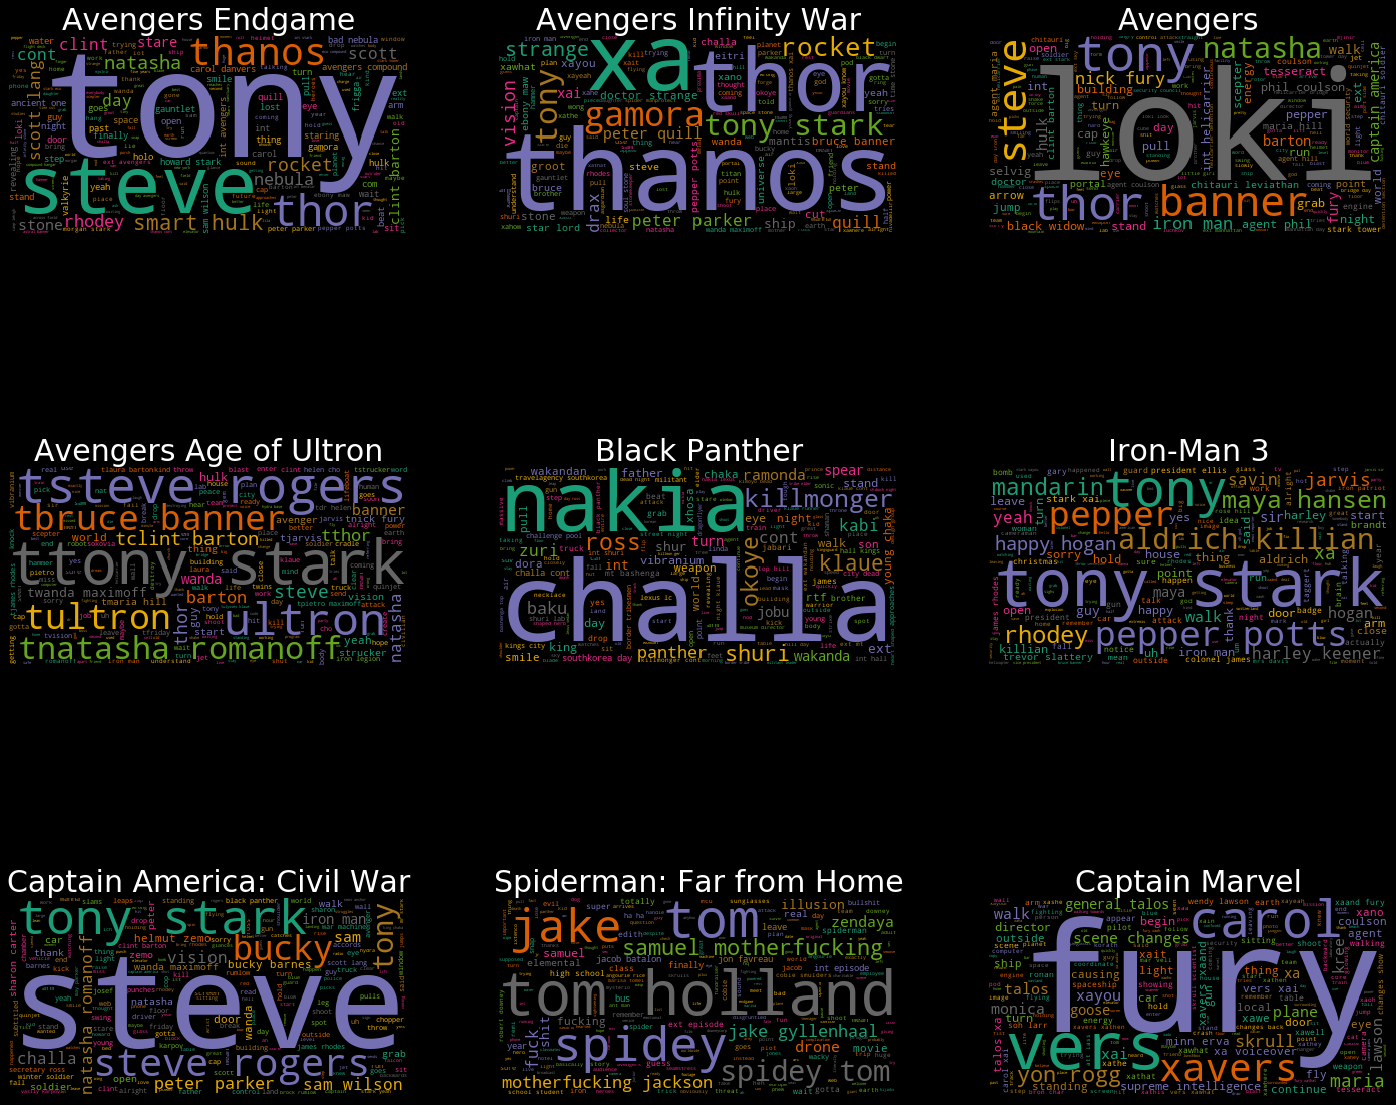

In [15]:
#For Marvel
stopwords_Marvel = [word for word, count in Counter(words_Marvel).most_common() if count > 6]#['tony','steve','thor','xa','thanos','loki','banner', 'natasha', 'gamora', 'nick fury', 'iron']
stop_words_Marvel = text.ENGLISH_STOP_WORDS.union(stopwords_Marvel)


from pil import Image
from wordcloud import WordCloud


# Setting up the size of the figure
fig = plt.figure(figsize = (20, 25))

# Generating a word cloud for each Movie
for i in range(len(data_transpose_Marvel.columns)):
#     mask = np.array(Image.open(images[i]))
    wc = WordCloud(stopwords=stop_words_Marvel, background_color="black", 
                   colormap="Dark2", max_font_size=150, 
                   random_state=27,)# mask = mask)
    wc.generate(Marvel["Clean_Script"][i])
    
    ax = fig.add_subplot(4, 3, i+1)
    ax.imshow(wc, interpolation="None")
    ax.axis("off")
    plt.title(Marvel["Title"][i], color = "white", fontsize = 30)

# Prettifying the plot
plt.tight_layout()
plt.show()

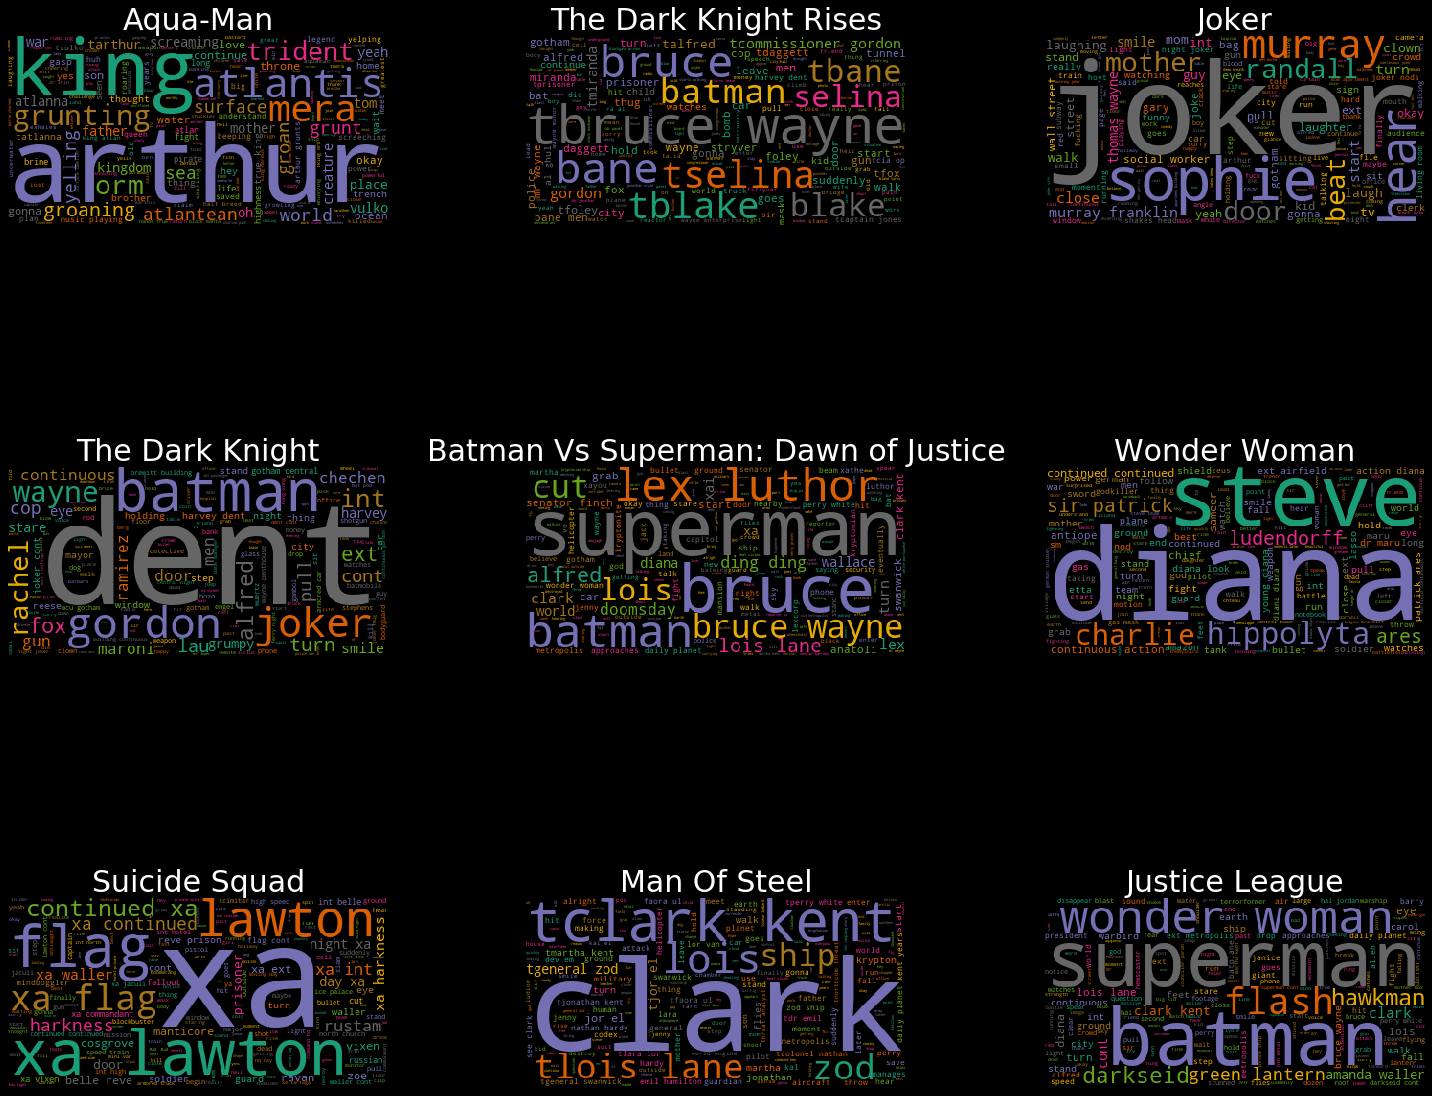

In [16]:
#DC
stopwords_DC = [word for word, count in Counter(words_DC).most_common() if count > 6]
stopwords_DC
stop_words_DC = text.ENGLISH_STOP_WORDS.union(stopwords_DC)


from pil import Image
from wordcloud import WordCloud


# Setting up the size of the figure
fig = plt.figure(figsize = (20, 25))

# Generating a word cloud for each Movie
for i in range(len(data_transpose_DC.columns)):
#     mask = np.array(Image.open(images[i]))
    wc = WordCloud(stopwords=stop_words_DC, background_color="black", 
                   colormap="Dark2", max_font_size=150, 
                   random_state=27,)# mask = mask)
    wc.generate(DC["Clean_Script"][i])
    
    ax = fig.add_subplot(4, 3, i+1)
    ax.imshow(wc, interpolation="nearest")
    ax.axis("off")
    plt.title(DC["Title"][i], color = "white", fontsize = 30)

# Prettifying the plot
plt.tight_layout()
plt.show()

In [17]:
plt.style.use('dark_background')
data_bad_words_Marvel = data_transpose_Marvel.transpose()[['fucking', 'fuck','motherfucking','shit', 'happy', 'excited', 'sad']]
data_profanity_Marvel = pd.concat([data_bad_words_Marvel.fucking + data_bad_words_Marvel.fuck + data_bad_words_Marvel.motherfucking, data_bad_words_Marvel.shit, data_bad_words_Marvel.happy + data_bad_words_Marvel.excited, data_bad_words_Marvel.sad], axis=1)
data_profanity_Marvel.columns = ['F_word', 'S_word', 'Happy_words', 'Sad_words']
data_profanity_Marvel['Box_Office(In Million Dollars)']= Marvel['Box_Office(In Million Dollars)'].values
data_profanity_Marvel.sort_values(by=['F_word','S_word','Happy_words','Sad_words','Box_Office(In Million Dollars)'],ascending=False, inplace = True)
data_profanity_Marvel

,F_word,S_word,Happy_words,Sad_words,Box_Office(In Million Dollars)
Spiderman: Far from Home,41,11,1,1,1131.927996
Avengers,13,11,0,0,1518.812988
Black Panther,0,7,2,0,1346.913171
Avengers Endgame,0,5,16,3,2797.800564
Captain America: Civil War,0,4,3,1,1153.304495
Avengers Infinity War,0,4,3,0,2048.359754
Avengers Age of Ultron,0,1,2,0,1405.403694
Captain Marvel,0,1,0,0,1128.274794
Iron-Man 3,0,0,81,0,1214.811252


In [18]:
plt.style.use('dark_background')
data_bad_words_DC = data_transpose_DC.transpose()[['fucking', 'fuck','shit', 'happy', 'excited', 'sad']]
data_profanity_DC = pd.concat([data_bad_words_DC.fucking + data_bad_words_DC.fuck, data_bad_words_DC.shit, data_bad_words_DC.happy + data_bad_words_DC.excited, data_bad_words_DC.sad], axis=1)
data_profanity_DC.columns = ['F_word', 'S_word', 'Happy_words', 'Sad_words']
data_profanity_DC['Box_Office(In Million Dollars)']= DC['Box_Office(In Million Dollars)'].values
data_profanity_DC.sort_values(by=['F_word','S_word','Happy_words','Sad_words','Box_Office(In Million Dollars)'],ascending=False, inplace = True)
data_profanity_DC

,F_word,S_word,Happy_words,Sad_words,Box_Office(In Million Dollars)
Joker,34,13,27,4,1074.251311
Batman Vs Superman: Dawn of Justice,1,1,1,3,873.634919
Suicide Squad,0,9,1,1,746.846894
Aqua-Man,0,6,0,0,1148.161807
Justice League,0,3,4,1,657.924295
Man Of Steel,0,1,2,2,668.045518
The Dark Knight,0,0,22,0,1004.558444
The Dark Knight Rises,0,0,6,0,1081.041287
Wonder Woman,0,0,4,1,821.847012


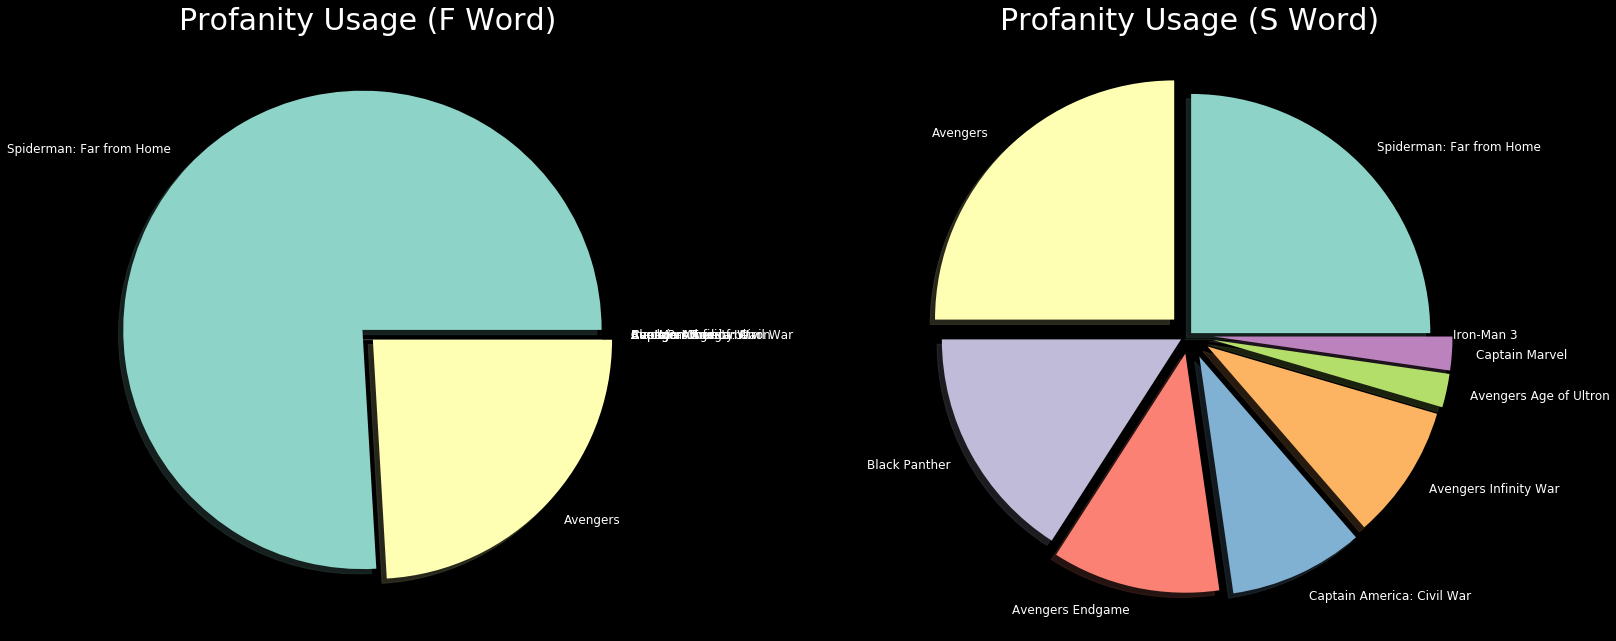

In [19]:
plt.figure(figsize = (27, 11))
plt.rcParams['font.size'] = 12.0

explode = (0.03, 0.03, 0, 0, 0, 0, 0, 0,0) 
plt.subplot(1, 2, 1)
plt.pie(data_profanity_Marvel["F_word"], labels = data_profanity_Marvel.index, explode = explode, shadow = True)
plt.title("Profanity Usage (F Word)", fontsize = 30)

explode = (0.01, 0.09, 0.04, 0.08, 0.1, 0.09, 0.1, 0.1,0)
plt.subplot(1, 2, 2)
plt.pie(data_profanity_Marvel["S_word"], labels = data_profanity_Marvel.index, explode = explode, shadow = True)
plt.title("Profanity Usage (S Word)", fontsize = 30)

plt.show()

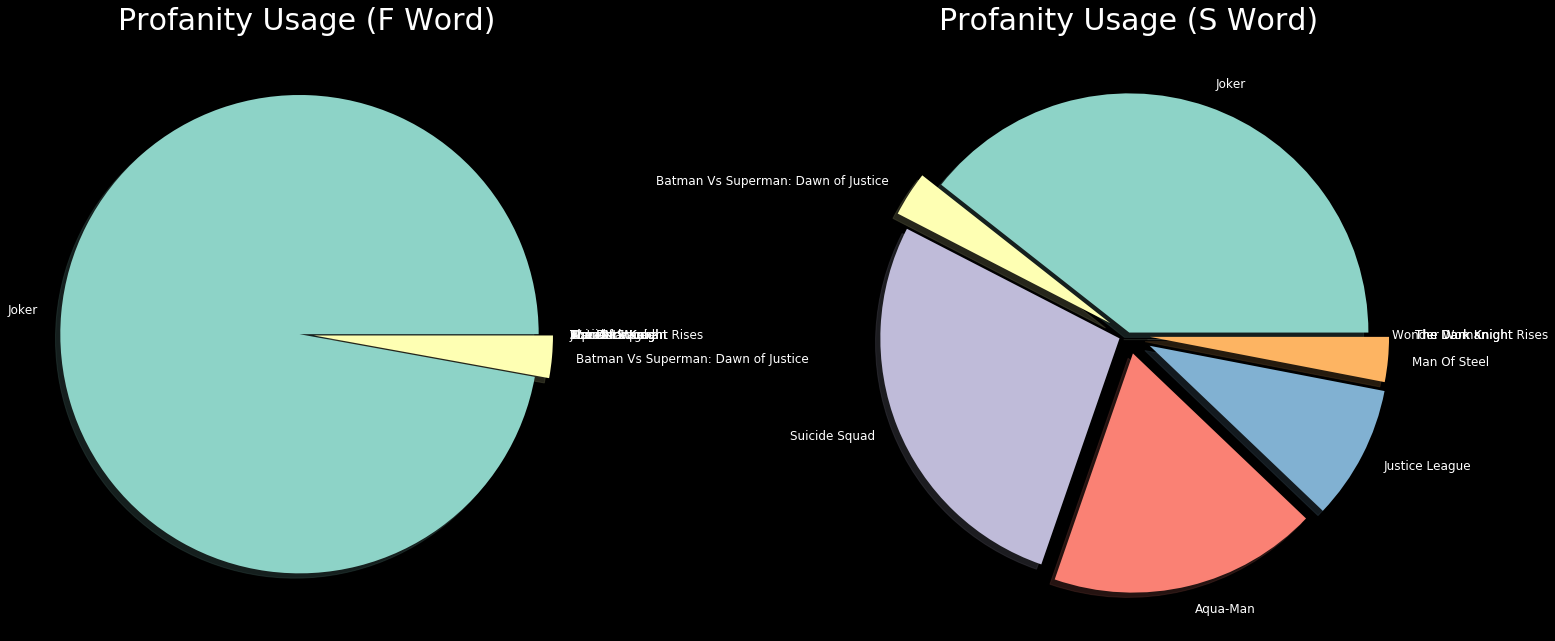

In [20]:
plt.figure(figsize = (27, 11))
plt.rcParams['font.size'] = 12.0

explode = (0.03, 0.03, 0, 0, 0, 0, 0, 0,0) 
plt.subplot(1, 2, 1)
plt.pie(data_profanity_DC["F_word"], labels = data_profanity_DC.index, explode = explode, shadow = True)
plt.title("Profanity Usage (F Word)", fontsize = 30)

explode = (0.01, 0.09, 0.04, 0.08, 0.1, 0.09, 0.1, 0.1,0)
plt.subplot(1, 2, 2)
plt.pie(data_profanity_DC["S_word"], labels = data_profanity_DC.index, explode = explode, shadow = True)
plt.title("Profanity Usage (S Word)", fontsize = 30)

plt.show()

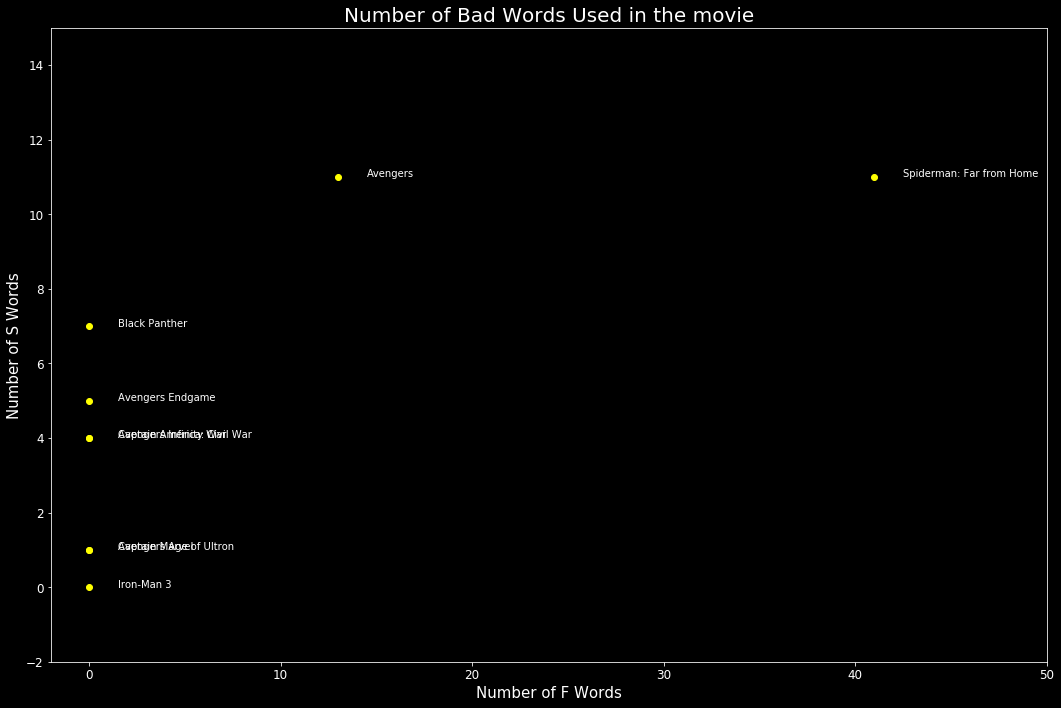

In [21]:
Marvel.index = data_profanity_Marvel.index

plt.figure(figsize = (15, 10))
for i, Title in enumerate(data_profanity_Marvel.index):
    
    x = data_profanity_Marvel.F_word.loc[Title]
    y = data_profanity_Marvel.S_word.loc[Title]
    plt.scatter(x, y, color='yellow')
    plt.text(x+1.5, y, data_profanity_Marvel.index[i], fontsize=10)
    plt.ylim(-2, 15)
    plt.xlim(-2, 50) 

# Prettifying the plot    
plt.title('Number of Bad Words Used in the movie', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)
plt.tight_layout()
# data_profanity_Marvel

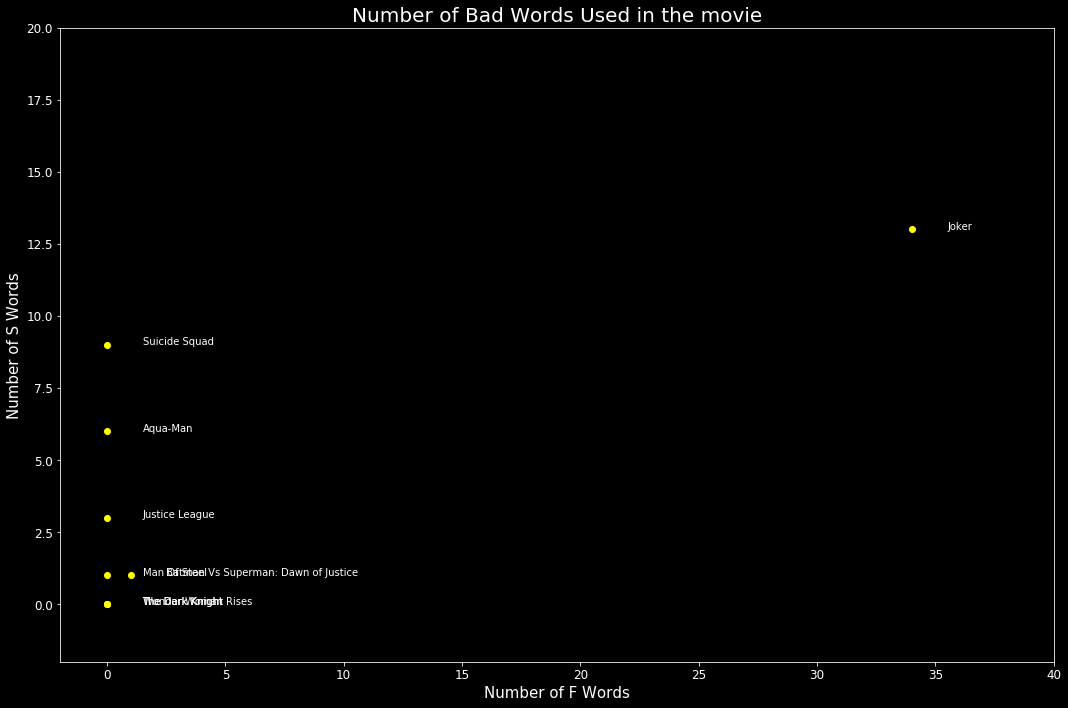

In [22]:
plt.figure(figsize = (15, 10))
for i, Title in enumerate(data_profanity_DC.index):
    x = data_profanity_DC.F_word.loc[Title]
    y = data_profanity_DC.S_word.loc[Title]
    plt.scatter(x, y, color='yellow')
    plt.text(x+1.5, y, data_profanity_DC.index[i], fontsize=10)
    plt.ylim(-2, 20)
    plt.xlim(-2, 40) 

# Prettifying the plot    
plt.title('Number of Bad Words Used in the movie', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)
plt.tight_layout()

In [23]:
word_list_Marvel = [len(data_transpose_Marvel[data_transpose_Marvel[Title] >= 1]) for Title in data_transpose_Marvel.columns]

# Creating a dataframe that contains the number of unique words used in each movie
data_words_Marvel = pd.DataFrame(list(zip(data_transpose_Marvel.columns, word_list_Marvel)), columns=['Title', 'Unique_Words'])
data_words_Marvel

,Title,Unique_Words
0,Avengers Endgame,3496
1,Avengers Infinity War,2404
2,Avengers,3011
3,Avengers Age of Ultron,2112
4,Black Panther,3284
5,Iron-Man 3,2376
6,Captain America: Civil War,3082
7,Spiderman: Far from Home,1018
8,Captain Marvel,2473


In [24]:
word_list_DC = [len(data_transpose_DC[data_transpose_DC[Title] >= 1]) for Title in data_transpose_DC.columns]

# Creating a dataframe that contains the number of unique words used by each movie
data_words_DC = pd.DataFrame(list(zip(data_transpose_DC.columns, word_list_DC)), columns=['Title', 'Unique_Words'])
data_words_DC

,Title,Unique_Words
0,Aqua-Man,1370
1,The Dark Knight Rises,2430
2,Joker,2732
3,The Dark Knight,3688
4,Batman Vs Superman: Dawn of Justice,2796
5,Wonder Woman,3449
6,Suicide Squad,3229
7,Man Of Steel,1966
8,Justice League,4540


In [25]:
total_words_Marvel = [sum(data_transpose_Marvel[Title]) for Title in data_transpose_Marvel.columns]

# Initializing the time interval of eact movie's duration
Duration_Marvel = [181, 149, 143, 141, 134, 130, 147, 129, 123]                        #Source IMDB.com

# Adding new columns to the dataframe 
data_words_Marvel['Total_Words'] = total_words_Marvel
data_words_Marvel['Duration'] = Duration_Marvel
data_words_Marvel['words_per_minute'] = data_words_Marvel['Total_Words'] / data_words_Marvel['Duration']
data_words_Marvel['Box_Office(In Million Dollars)']= Marvel['Box_Office(In Million Dollars)'].values
data_words_Marvel

,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars)
0,Avengers Endgame,3496,14163,181,78.248619,2797.800564
1,Avengers Infinity War,2404,8527,149,57.228188,2048.359754
2,Avengers,3011,12585,143,88.006993,1518.812988
3,Avengers Age of Ultron,2112,8099,141,57.439716,1405.403694
4,Black Panther,3284,12340,134,92.089552,1346.913171
5,Iron-Man 3,2376,9145,130,70.346154,1214.811252
6,Captain America: Civil War,3082,11564,147,78.666667,1153.304495
7,Spiderman: Far from Home,1018,2033,129,15.759690,1131.927996
8,Captain Marvel,2473,8981,123,73.016260,1128.274794


In [26]:
total_words_DC = [sum(data_transpose_DC[Title]) for Title in data_transpose_DC.columns]

# # Initializing the time interval of each movie's duration
Duration_DC = [143, 164, 122, 152, 151, 141, 123, 143, 120]                        #Source IMDB.com

# Adding new columns to the dataframe 
data_words_DC['Total_Words'] = total_words_DC
data_words_DC['Duration'] = Duration_DC
data_words_DC['words_per_minute'] = data_words_DC['Total_Words'] / data_words_DC['Duration']
data_words_DC['Box_Office(In Million Dollars)']= DC['Box_Office(In Million Dollars)'].values
data_words_DC

,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars)
0,Aqua-Man,1370,3547,143,24.804196,1148.161807
1,The Dark Knight Rises,2430,9825,164,59.908537,1081.041287
2,Joker,2732,13027,122,106.778689,1074.251311
3,The Dark Knight,3688,16135,152,106.151316,1004.558444
4,Batman Vs Superman: Dawn of Justice,2796,8733,151,57.834437,873.634919
5,Wonder Woman,3449,14199,141,100.702128,821.847012
6,Suicide Squad,3229,13708,123,111.447154,746.846894
7,Man Of Steel,1966,7122,143,49.804196,668.045518
8,Justice League,4540,19996,120,166.633333,657.924295


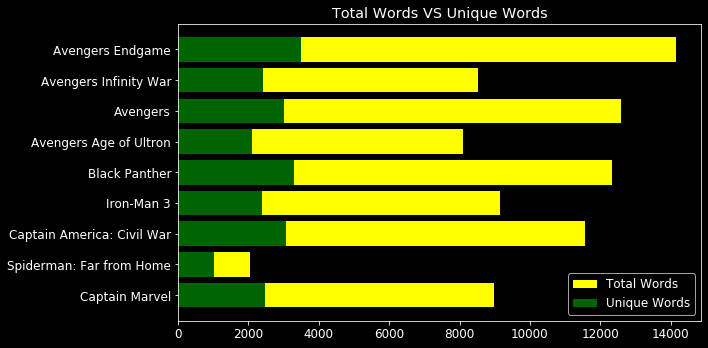

In [27]:
data_words_Marvel.sort_values(by='Box_Office(In Million Dollars)', inplace = True)


# Plotting total words v/s unique words for each movie script
plt.figure(figsize=(10,5))
plt.barh(data_words_Marvel["Title"], data_words_Marvel["Total_Words"], label = "Total Words", color = "yellow")
plt.barh(data_words_Marvel["Title"], data_words_Marvel["Unique_Words"], label = "Unique Words", color = "darkgreen")
plt.title("Total Words VS Unique Words")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

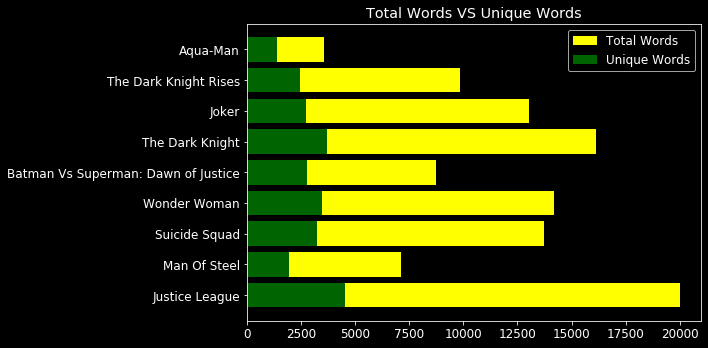

,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars)
0,Aqua-Man,1370,3547,143,24.804196,1148.161807
1,The Dark Knight Rises,2430,9825,164,59.908537,1081.041287
2,Joker,2732,13027,122,106.778689,1074.251311
3,The Dark Knight,3688,16135,152,106.151316,1004.558444
4,Batman Vs Superman: Dawn of Justice,2796,8733,151,57.834437,873.634919
5,Wonder Woman,3449,14199,141,100.702128,821.847012
6,Suicide Squad,3229,13708,123,111.447154,746.846894
7,Man Of Steel,1966,7122,143,49.804196,668.045518
8,Justice League,4540,19996,120,166.633333,657.924295


In [28]:
data_words_DC['Box_Office(In Million Dollars)'] = pd.to_numeric(data_words_DC['Box_Office(In Million Dollars)'])
data_words_DC.sort_values(by='Box_Office(In Million Dollars)', inplace = True)

# Plotting total words v/s unique words for each movie script
plt.figure(figsize=(10,5))
plt.barh(data_words_DC["Title"], data_words_DC["Total_Words"], label = "Total Words", color = "yellow")
plt.barh(data_words_DC["Title"], data_words_DC["Unique_Words"], label = "Unique Words", color = "darkgreen")
plt.title("Total Words VS Unique Words")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.show()

data_words_DC = data_words_DC[::-1]
data_words_DC

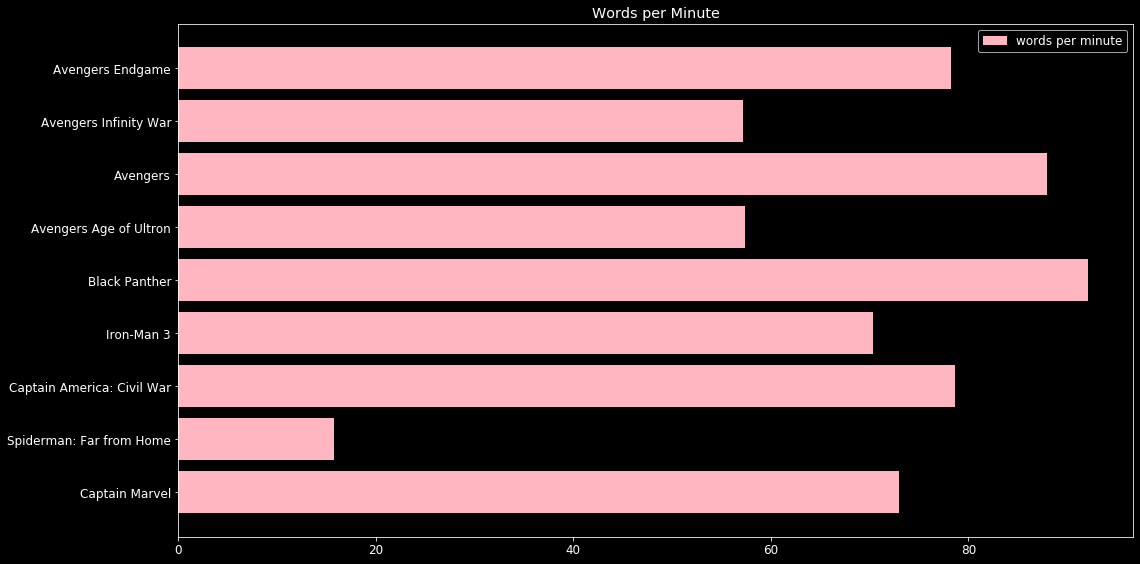

In [29]:
# Plotting words per minute for each Movie
plt.figure(figsize=(16,8))
plt.barh(data_words_Marvel["Title"], data_words_Marvel["words_per_minute"], label = "words per minute", color = "lightpink")
plt.title("Words per Minute")
plt.legend()
plt.tight_layout()
plt.show()

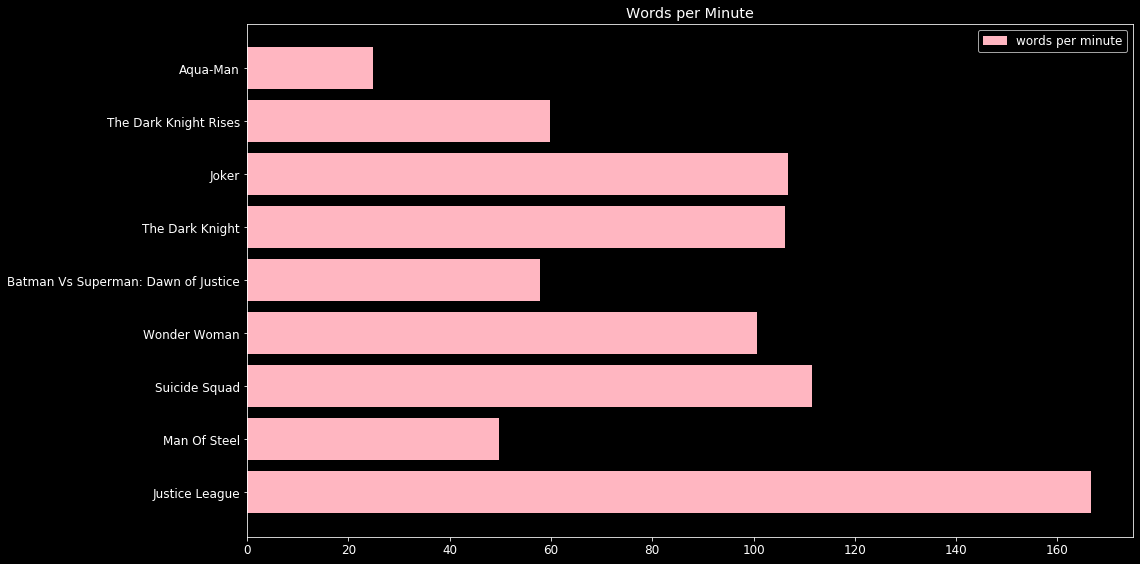

,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars)
0,Aqua-Man,1370,3547,143,24.804196,1148.161807
1,The Dark Knight Rises,2430,9825,164,59.908537,1081.041287
2,Joker,2732,13027,122,106.778689,1074.251311
3,The Dark Knight,3688,16135,152,106.151316,1004.558444
4,Batman Vs Superman: Dawn of Justice,2796,8733,151,57.834437,873.634919
5,Wonder Woman,3449,14199,141,100.702128,821.847012
6,Suicide Squad,3229,13708,123,111.447154,746.846894
7,Man Of Steel,1966,7122,143,49.804196,668.045518
8,Justice League,4540,19996,120,166.633333,657.924295


In [30]:
data_words_DC = data_words_DC[::-1]
data_words_DC

# Plotting words per minute for each Movie
plt.figure(figsize=(16,8))
plt.barh(data_words_DC["Title"], data_words_DC["words_per_minute"], label = "words per minute", color = "lightpink")
plt.title("Words per Minute")
plt.legend()
plt.tight_layout()
plt.show()

data_words_DC = data_words_DC[::-1]
data_words_DC

In [31]:
from textblob import TextBlob

# Defining labmda functions to determine the polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_words_Marvel = data_words_Marvel[::-1]

# # Applying the lambda functions
data_words_Marvel['polarity'] = Marvel['Script'].apply(pol).values
data_words_Marvel['subjectivity'] = Marvel['Script'].apply(sub).values
data_words_Marvel

C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars),polarity,subjectivity
0,Avengers Endgame,3496,14163,181,78.248619,2797.800564,0.040147,0.484444
1,Avengers Infinity War,2404,8527,149,57.228188,2048.359754,0.010911,0.473533
2,Avengers,3011,12585,143,88.006993,1518.812988,-0.000306,0.464355
3,Avengers Age of Ultron,2112,8099,141,57.439716,1405.403694,-0.048399,0.527259
4,Black Panther,3284,12340,134,92.089552,1346.913171,0.064685,0.429366
5,Iron-Man 3,2376,9145,130,70.346154,1214.811252,0.055791,0.555190
6,Captain America: Civil War,3082,11564,147,78.666667,1153.304495,-0.030258,0.503395
7,Spiderman: Far from Home,1018,2033,129,15.759690,1131.927996,0.039245,0.556948
8,Captain Marvel,2473,8981,123,73.016260,1128.274794,0.052026,0.425790


In [32]:
# Defining labmda functions to determine the polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_words_DC = data_words_DC[::-1]
data_words_DC

data_words_DC['polarity'] = DC['Script'].apply(pol).values
data_words_DC['subjectivity'] = DC['Script'].apply(sub).values

data_words_DC

C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sunny\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Title,Unique_Words,Total_Words,Duration,words_per_minute,Box_Office(In Million Dollars),polarity,subjectivity
8,Justice League,4540,19996,120,166.633333,657.924295,0.104024,0.499826
7,Man Of Steel,1966,7122,143,49.804196,668.045518,0.043427,0.461016
6,Suicide Squad,3229,13708,123,111.447154,746.846894,0.013462,0.432539
5,Wonder Woman,3449,14199,141,100.702128,821.847012,0.047123,0.449885
4,Batman Vs Superman: Dawn of Justice,2796,8733,151,57.834437,873.634919,0.033469,0.413057
3,The Dark Knight,3688,16135,152,106.151316,1004.558444,0.030938,0.463483
2,Joker,2732,13027,122,106.778689,1074.251311,0.033121,0.428033
1,The Dark Knight Rises,2430,9825,164,59.908537,1081.041287,0.036693,0.437086
0,Aqua-Man,1370,3547,143,24.804196,1148.161807,-0.002092,0.456264


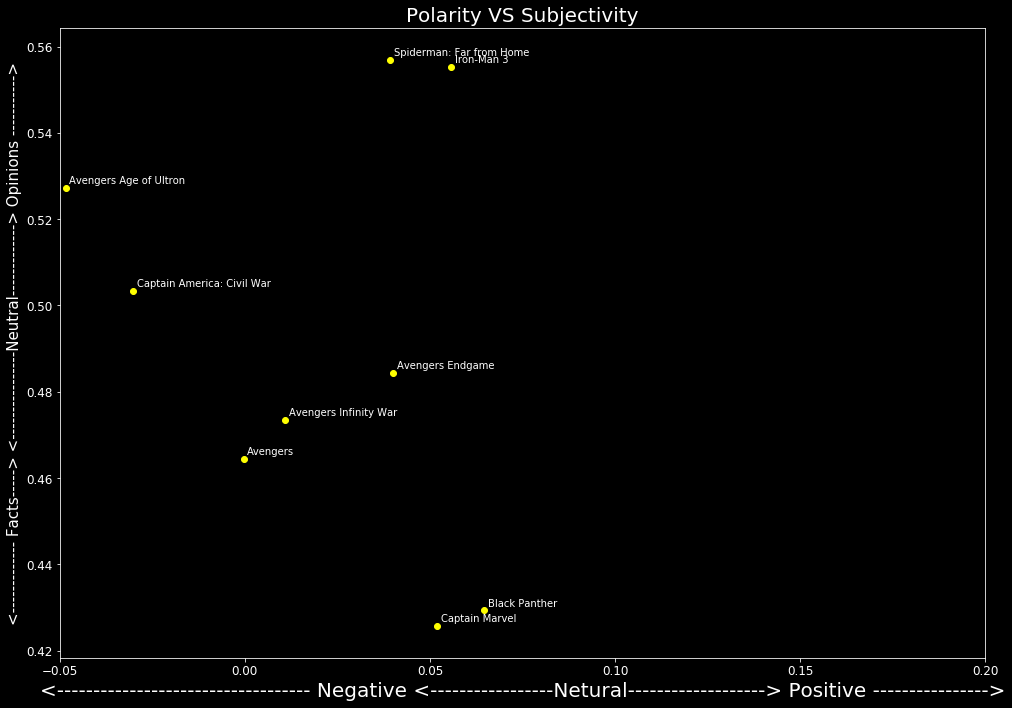

In [33]:
plt.figure(figsize=(15,10))
for i in range(len(data_words_Marvel["Title"])):
    x = data_words_Marvel.polarity.loc[i]
    y = data_words_Marvel.subjectivity.loc[i]
    plt.scatter(x, y, color='yellow')
    plt.text(x+.001, y+.001, data_words_Marvel['Title'][i], fontsize=10)
    plt.xlim(-.05, .2) 

# Prettifying the plot
plt.title('Polarity VS Subjectivity', fontsize=20)
plt.xlabel('<----------------------------------- Negative <-----------------Netural-------------------> Positive ---------------->', fontsize=20)
plt.ylabel('<------------- Facts-----> <----------------Neutral-------------> Opinions ----------->', fontsize=15)
plt.tight_layout()
plt.show()

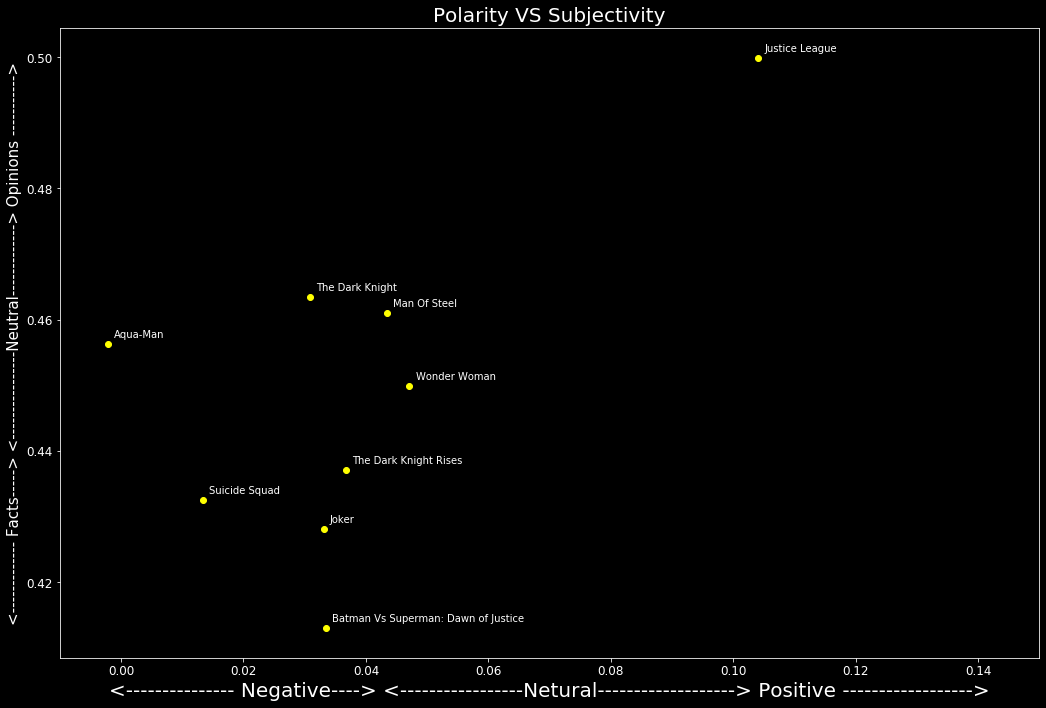

In [34]:
plt.figure(figsize=(15,10))
for i in range(len(data_words_DC["Title"])):
    x = data_words_DC.polarity.loc[i]
    y = data_words_DC.subjectivity.loc[i]
    plt.scatter(x, y, color='yellow')
    plt.text(x+.001, y+.001, data_words_DC['Title'][i], fontsize=10)
    plt.xlim(-.01, .15) 

# Prettifying the plot
plt.title('Polarity VS Subjectivity', fontsize=20)
plt.xlabel('<--------------- Negative----> <-----------------Netural-------------------> Positive ------------------>', fontsize=20)
plt.ylabel('<------------- Facts-----> <----------------Neutral-------------> Opinions ----------->', fontsize=15)
plt.tight_layout()
plt.show()